**Dimensionality reduction** is the process of reducing the number of features in a dataset while retaining as much information as possible. This can be done to reduce the complexity of a model, improve the performance of a learning algorithm, or make it easier to visualize the data.<br>
Techniques for dimensionality reduction include:<br>
 **.**principal component analysis (PCA)-PCA is a statistical technique used to reduce the dimensionality of large datasets by identifying the most important features. It works by transforming the data into a new coordinate system where the first axis represents the direction of the highest variance, the second axis represents the direction of the second highest variance, and so on. By doing so, PCA can help identify the most significant patterns in the data and reduce the number of features used in a model<br>
 **.**singular value decomposition(SVD)-SVD is a matrix decomposition technique used to break down a matrix into its constituent parts. It decomposes a matrix into three matrices: U, S, and V. U and V are orthogonal matrices, and S is a diagonal matrix containing the singular values of the original matrix. SVD is used in a variety of applications, including image compression, recommendation systems, and natural language processing.<br>
 **.**linear discriminant analysis (LDA).<br>




In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt

#Import the dimensionality reduction methods
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

So how can you find the principal components of a training set? Luckily, there is a
standard matrix factorization technique called Singular Value Decomposition (SVD)
that can decompose the training set matrix **X** into the matrix multiplication of three
matrices **U Σ VT**
, where V contains all the principal components that we are looking
for.<br>


In [2]:
df=pd.read_csv('train.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.shape

(42000, 785)

In [4]:
df=df.drop('label',axis=1)

In [7]:
X=df.values[:6000]

The following python code uses Numpy svd()to obtain all the principle components of the training set,then extracts the first two PCs.

In [9]:
#Using numpy
X_centered=X - X.mean(axis=0)
U,s,Vt=np.linalg.svd(X_centered)
c1=Vt.T[:,0]
c2=Vt.T[:,1]

**Using scikit-Learn**
Scikit-Learn's PCA class implements PCA using SVD just like we did before.The following code applies PCA to reduce the dimensionality of the dataset
down to two dimensions (note that it automatically takes care of centering the data):


In [10]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
x2D=pca.fit_transform(X)

After fitting the PCA transformer to the dataset, you can access the principal compo‐
nents using the components_ variable (note that it contains the PCs as horizontal vectors.So, for example, the first principal component is equal to pca.components_.T[:,0])


**Principal components**
Deciding how many principal components to retain in PCA involves a trade-off between reducing dimensionality and preserving information.Common approaches are;

**ExplainedVarianceRatio**
It indicates the proportion of the datasets variance that lies along the axis of each principal component.<br>
example

In [11]:
pca.explained_variance_ratio_

array([0.09634413, 0.07171227])

The first value, 0.09634413, indicates that the first principal component explains approximately 9.63% of the total variance in your original data.

The second value, 0.07171227, indicates that the second principal component explains approximately 7.17% of the total variance.

To interpret these values, it means that if you were to use only the first principal component, you would retain about 9.63% of the original data's variability. If you add the second principal component, the total retained variability would increase to approximately 16.8% (9.63% + 7.17%).

In other words, the first two principal components together capture around 16.8% of the total variability present in the original dataset. This gives you an insight into how much information is preserved when using these components for dimensionality reduction or feature extraction.


**CumulativeExplainedVariance**
 cumulative explained variance plot can also help you decide how many principal components to retain based on a desired level of retained variance. If you find that the cumulative explained variance starts to level off after a certain point, it might be a suitable number of components to retain while still capturing a significant portion of the data's variance.

In [13]:
#Standardize the data
from sklearn.preprocessing import StandardScaler
X=df.values
X_std=StandardScaler().fit_transform(X)

#Calculating Eigenvectors and EigenValues of Cov matrix
mean_vec=np.mean(X_std,axis=0)
cov_matrix=np.cov(X_std.T)
eig_vals,eig_vecs=np.linalg.eig(cov_matrix)

#create a list of eigenvalues,eigenvector pair from high to low
eig_pairs=[(np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]

#sort the eigeevalue ,eigenvector pair from high to low
eig_pairs.sort(key=lambda x: x[0],reverse=True)

#Caculation of ExplainednVariance from the eigenvalues
tot=sum(eig_vals)
var_exp=[(i/tot)*100 for i in sorted(eig_vals,reverse=True)] # individual explained variance

#cumulative explained variance
cum_var_exp=np.cumsum(var_exp)


After executing this code, you'll have the eigenvalues, eigenvectors, explained variance, and cumulative explained variance, which can help you decide how many principal components to retain for dimensionality reduction while preserving most of the data's variance.<br>

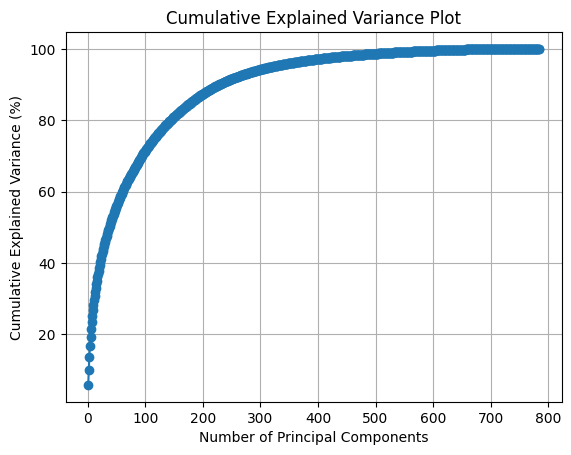

In [14]:
plt.plot(range(1, len(cum_var_exp) + 1), cum_var_exp, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('Cumulative Explained Variance Plot')
plt.grid()
plt.show()

In the above case,you can see that reducing the dimensionality to about 300 dimensions/features wouldn't lose too much explained variance.

**.**cumsum (MATLAB Functions) B = cumsum(A) returns the cumulative sum along different dimensions of an array. If A is a vector, cumsum(A) returns a vector containing the cumulative sum of the elements of A.

Now we have both our individual variance and cumulative explained variance.

**Percentage threshold**
Instead of arbitraly choosint the number of dimensions to reduce down to;You can set a threshold for the percentage of total variance you want to retain. For example, you might decide to retain enough components to explain 95% or 99% of the total variance. Count the number of components needed to reach or exceed that threshold.

In [17]:
pca=PCA()
pca.fit(X)
cumsum=np.cumsum(pca.explained_variance_ratio_)
d=np.argmax(cumsum>=0.95)+1
d

154

This suggests that you'll have only over 154  features instead of 784 original features

You could then set n_components=d and run PCA again.<br>
However, there is a much better option: instead of specifying the number of principal components you want to preserve, you can set n_components to be a float between 0.0 and 1.0, indicating the
ratio of variance you wish to preserve:

In [18]:
pca=PCA(n_components=0.95)
x_reduced=pca.fit_transform(X)

**Randomized PCA**
Randomized PCA (Principal Component Analysis) is a variation of the traditional PCA algorithm that uses randomized techniques to approximate the principal components of a dataset. It is particularly useful for handling large datasets where traditional PCA might be computationally expensive or memory-intensive.

Instead of directly computing the eigenvectors of the covariance matrix, Randomized PCA starts by projecting the data onto a random subspace of lower dimension. This subspace is determined by a randomized projection matrix.

In [ ]:
rnd_pca=PCA(n_components=154,svd_solver='randomized')
x_reduced=rnd_pca.fit_transform(X)

**Incremental PCA**

Incremental PCA (IPCA) is a variant of Principal Component Analysis (PCA) that allows you to perform PCA on large datasets that might not fit into memory. It processes the data in small batches, making it a memory-efficient approach for dimensionality reduction and feature extraction.

Traditional PCA requires computing the covariance matrix of the entire dataset, which can be computationally expensive and memory-intensive for large datasets. IPCA, on the other hand, breaks down the computation into smaller chunks, updating the principal components iteratively as new data batches are processed.

In [ ]:
from sklearn.decomposition import IncrementalPCA
n_batches=100
inc_pca=InrementalPCA(n_components=154)
for x_batches in np.array_split(X,n_batches):
    inc_pca.partial_fit(x_batch)
x_reduced=inc_pca.transform(X)

**Kernel PCA**
Kernel Principal Component Analysis (Kernel PCA) is a nonlinear dimensionality reduction technique that extends the concept of Principal Component Analysis (PCA) to capture nonlinear relationships in the data. While traditional PCA works well for linearly separable data, Kernel PCA is capable of capturing complex patterns and structures in the data by applying a kernel function.

In [ ]:
from sklearn.decomposition import KernelPCA


kpca = KernelPCA(n_components=2, kernel='rbf')
principal_components = kpca.fit_transform(X)